In [71]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.pyplot import figure
from google.colab import drive
drive.mount('/content/drive')


%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
file_path = '/content/drive/My Drive/nndl/movies.csv'
df =pd.read_csv(file_path)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [73]:
# searching for any missing data
df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [74]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [75]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [76]:
# create a correct year column
df['released'] = df['released'].astype(str)

def extract_year(released):
    match = re.search(r'\b\d{4}\b', released)  # Look for a 4-digit number
    if match:
        return match.group(0)  # Return the matched year
    else:
        return None  # Return None if no 4-digit number is found

df['year_correct'] = df['released'].apply(extract_year)


In [77]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [78]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

In [79]:
pd.set_option('display.max_rows', None)

In [80]:
# Drop any duplicates

df.drop_duplicates()

Output hidden; open in https://colab.research.google.com to view.

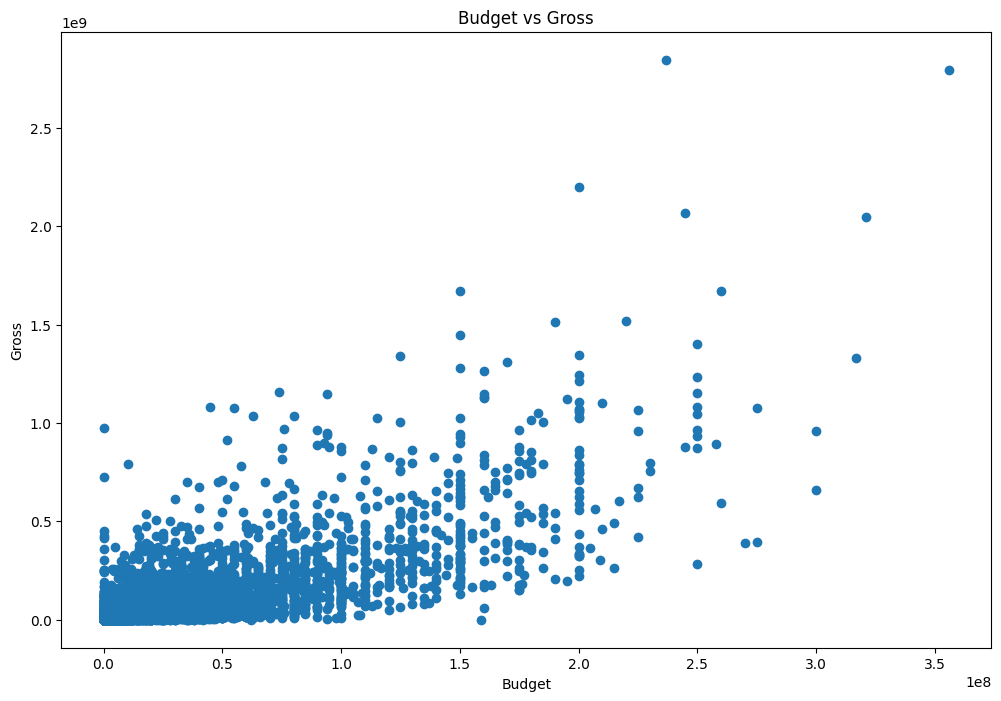

<function matplotlib.pyplot.show(close=None, block=None)>

In [93]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()
plt.show

<Axes: xlabel='budget', ylabel='gross'>

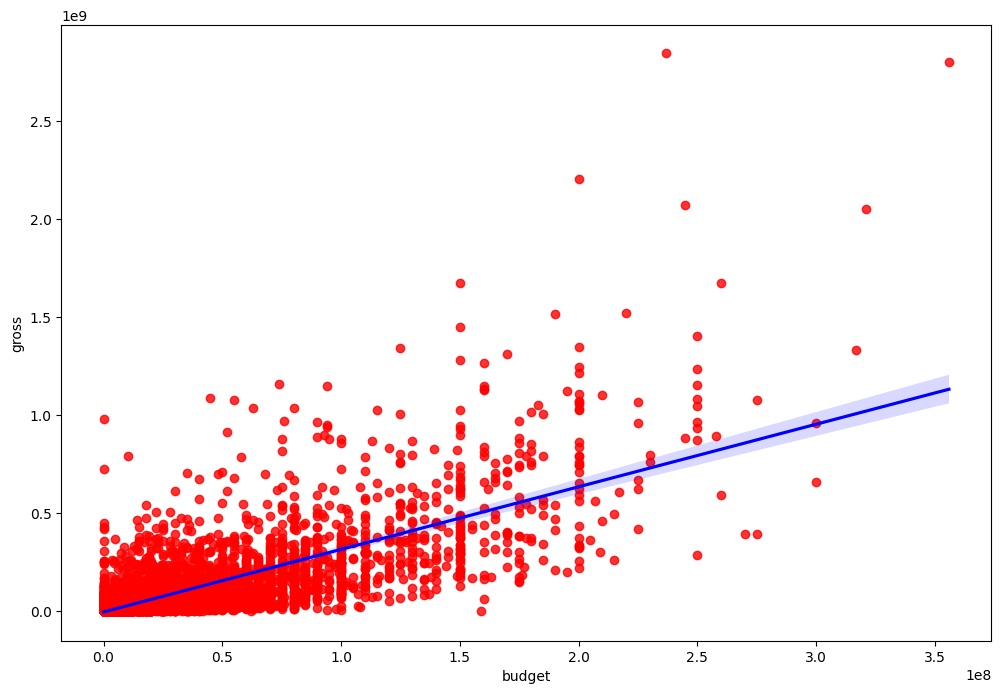

In [82]:
# plot budget vs gross
sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

In [86]:
# Select the specified columns
selected_columns = ['budget', 'gross', 'runtime', 'score', 'votes', 'year']

# Calculate the correlation matrix for the selected columns
df[selected_columns].corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.716816,0.246748,-0.007500,0.604627,0.291152
gross,0.716816,1.000000,0.256783,0.132569,0.752265,0.314681
runtime,0.246748,0.256783,1.000000,0.399857,0.290159,0.142977
score,-0.007500,0.132569,0.399857,1.000000,0.428138,0.099045
votes,0.604627,0.752265,0.290159,0.428138,1.000000,0.469829
year,0.291152,0.314681,0.142977,0.099045,0.469829,1.000000


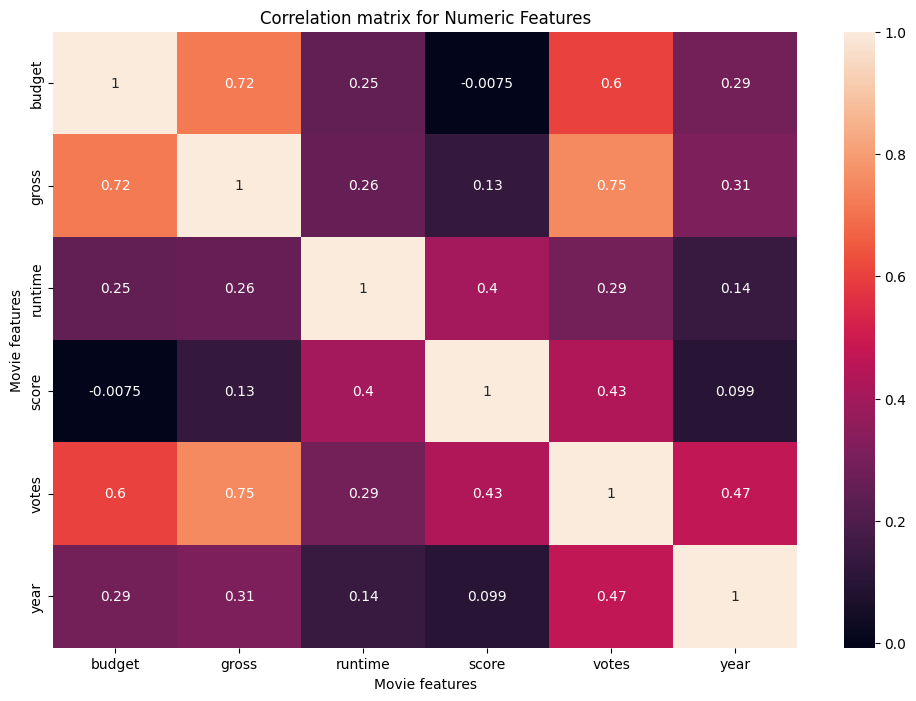

In [87]:
correlation_matrix = df[selected_columns].corr(method='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [91]:
df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


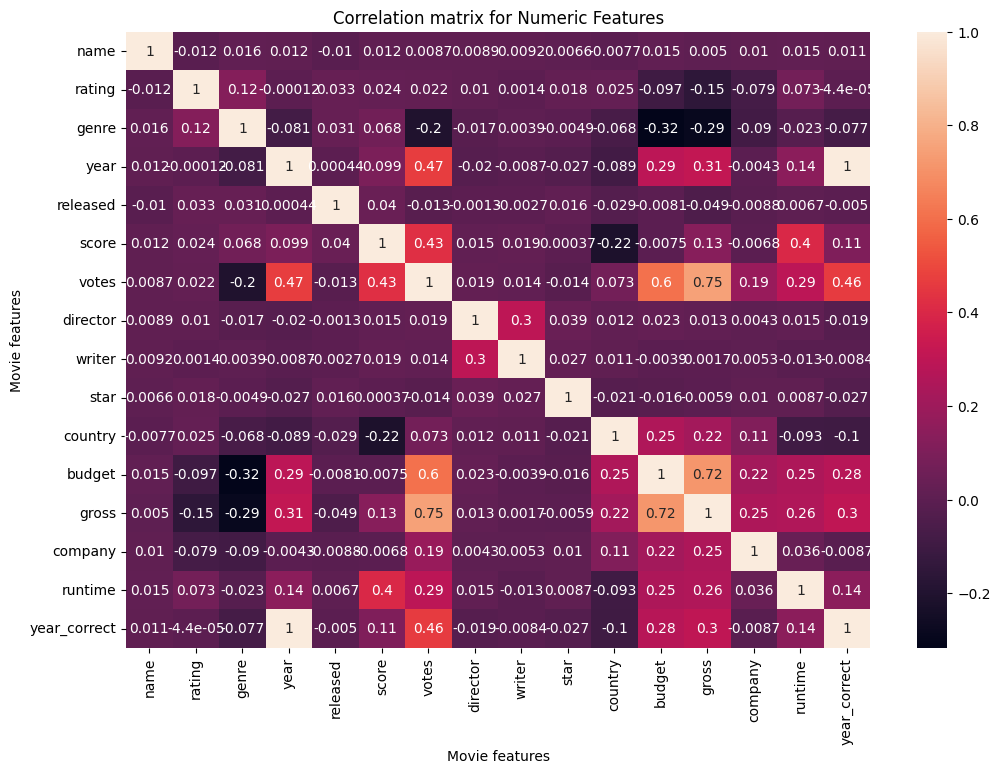

In [92]:
correlation_matrix = df_numerized.corr(method='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()